In [1]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import functools
import math

plt.rcParams.update({'font.size': 45})

# Objective function
def f(x):
    x1, x2 = x
    return 0.02*x1*x1 + 0.005*x2*x2

def L2(x):
    x1, x2 = x
    return math.sqrt(x1*x1 + x2*x2)

def grad1(x1):
    return 0.04*x1

def grad2(x2):
    return 0.01*x2

def grad(x):
    x1, x2 = x
    grad = np.array([0.04*x1, 0.01*x2])
    return grad

def hessian(x):
    hessian = np.array([[0.04, 0], [0, 0.01]])
    return hessian

In [2]:
# Range of time
time = int(300)

dpi=100
eps= 0.0001
t = np.linspace(0, time, time+1)

In [3]:
#Calculate Nesterov's method (NAG-C)
def Nesterov1(time=time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (2*k+2*eps+1)*(k+eps-1)*(k+eps-1) / (2*k+2*eps-1)/(k+eps+1)/(k+eps+1)
        Nes[k+1] = y -  (2*k+2*eps+1)*(2*k+2*eps+1)*grad(y)/(k+eps+1)/(k+eps+1)/4
    return Nes
Nes1 = Nesterov1()

In [4]:
#Calculate Nesterov's method (NAG-C) with restarting scheme
def Nesterov2(time=time, kmin=20):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    j = 1
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (2*j+2*eps+1)*(j+eps-1)*(j+eps-1) / (2*j+2*eps-1)/(j+eps+1)/(j+eps+1)
        Nes[k+1] = y -  (2*j+2*eps+1)*(2*j+2*eps+1)*grad(y)/(j+eps+1)/(j+eps+1)/4
        if np.dot(Nes[k+1]-2*Nes[k]+Nes[k-1], Nes[k]-Nes[k-1]) < 0 and j>= kmin:
            j=1
            Nes[k+1] = Nes[k] -  grad(Nes[k])
        else:
            j=j+1
    return Nes
Nes2 = Nesterov2()

In [5]:
Nes1_func = np.apply_along_axis(f, 1, Nes1)
Nes2_func = np.apply_along_axis(f, 1, Nes2)

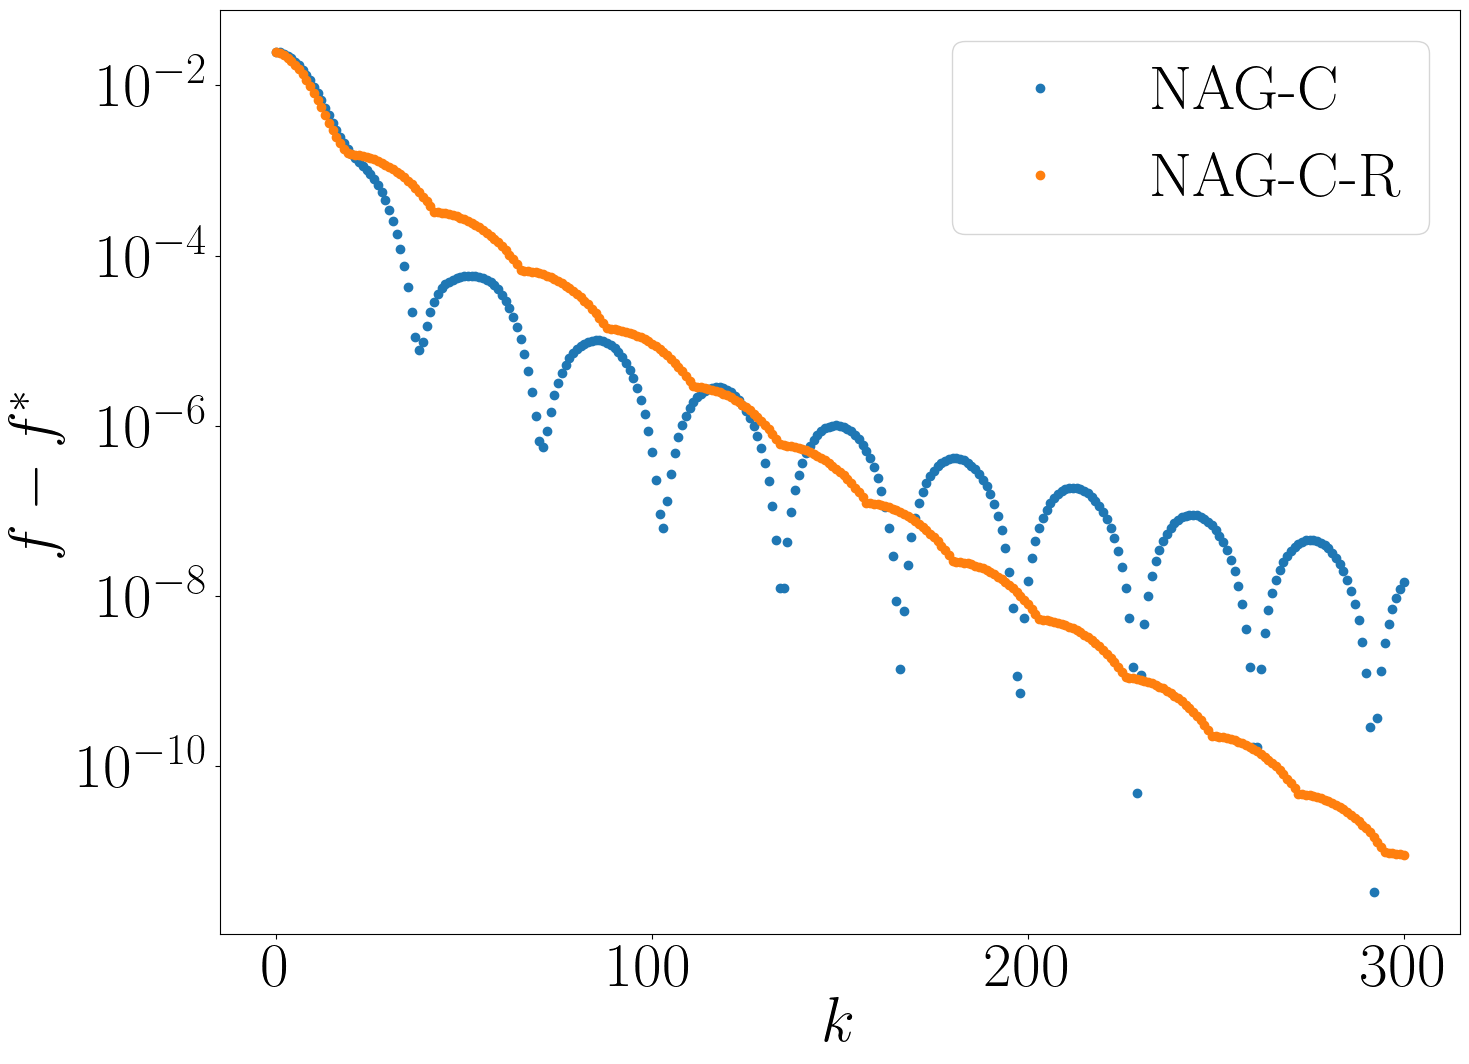

In [6]:
plt.figure(figsize=(16,12))
plt.plot(t, Nes1_func, '.', label="NAG-C", markersize=12)
plt.plot(t, Nes2_func, '.', label="NAG-C-R", markersize=12)
plt.xlabel('$k$', labelpad=0)
plt.ylabel('$f-f^*$', labelpad=10)
plt.yscale('log')
plt.legend()
plt.savefig('Restarting_CV.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()